# Exploratory Data Analysis

In [11]:
# Python core
from collections import defaultdict
from pathlib import Path

# Numerics
import numpy as np
import pandas as pd
from skimage.measure import regionprops, label, regionprops_table, shannon_entropy, euler_number

# Radiomics
import nibabel as nib

# Plotting
import matplotlib.pyplot as plt
import plotly.express as px

# Custom functions
from brats21.visualisation import plot_patient_modalities
from brats21 import utils as bu

# Other
from tqdm.notebook import tqdm

In [2]:
# Dataset main path
DATASET_PATH = Path("dataset/RSNA_ASNR_MICCAI_BraTS2021_TrainingData")

In [3]:
# Get all patient paths
patients = list(DATASET_PATH.iterdir())

## Unique Nifti headers
Information on header meaning can be found [here](https://brainder.org/2012/09/23/the-nifti-file-format/).

In [5]:
unique_headers = defaultdict(lambda: defaultdict(set))
different_patients = set()

for patient in tqdm(patients):
    for mod in ["flair", "t1", "t1ce", "t2", "seg"]:
        
        if mod == "flair":
            nifti = bu.load_flair(patient)
        elif mod == "t1":
            nifti = bu.load_t1(patient)
        elif mod == "t1ce":
            nifti = bu.load_t1ce(patient)
        elif mod == "t2":
            nifti = bu.load_t2(patient)
        elif mod == "seg":
            nifti = bu.load_seg(patient)
        
        for key, value in nifti.header.items():
            if str(value) not in unique_headers[mod][str(key)]:
                unique_headers[mod][str(key)].add(str(value))
                if len(unique_headers[mod][str(key)]) > 0:
                    different_patients.add(patient)

  0%|          | 0/1251 [00:00<?, ?it/s]

In [6]:
print("NOT UNIQUE HEADER KEYS: \n")
for mod, header in unique_headers.items():
    for key, values in header.items():
        if len(values) > 1:
            print(mod, key, values)
    print()

NOT UNIQUE HEADER KEYS: 

flair datatype {'4', '16'}
flair bitpix {'32', '16'}
flair qform_code {'2', '1'}
flair sform_code {'1', '0'}
flair qoffset_x {'0.0', '-0.0'}
flair srow_x {'[0. 0. 0. 0.]', '[-1.  0.  0. -0.]', '[-1. -0. -0.  0.]', '[-1. -0. -0. -0.]'}
flair srow_y {'[ -0.  -1.  -0. 239.]', '[  0.  -1.   0. 239.]', '[0. 0. 0. 0.]'}
flair srow_z {'[0. 0. 0. 0.]', '[0. 0. 1. 0.]'}

t1 datatype {'4', '16'}
t1 bitpix {'32', '16'}
t1 xyzt_units {'2', '10'}
t1 cal_max {'0.0', '1247.0', '1426.0'}
t1 descrip {"b'FSL4.0'", "b''"}
t1 qform_code {'2', '1'}
t1 sform_code {'1', '0'}
t1 qoffset_x {'0.0', '-0.0'}
t1 srow_x {'[0. 0. 0. 0.]', '[-1.  0.  0. -0.]', '[-1.  0.  0.  0.]', '[-1. -0. -0.  0.]', '[-1. -0. -0. -0.]'}
t1 srow_y {'[ -0.  -1.  -0. 239.]', '[  0.  -1.   0. 239.]', '[0. 0. 0. 0.]'}
t1 srow_z {'[0. 0. 0. 0.]', '[0. 0. 1. 0.]'}

t1ce datatype {'4', '16'}
t1ce bitpix {'32', '16'}
t1ce qform_code {'2', '1'}
t1ce sform_code {'1', '0'}
t1ce qoffset_x {'0.0', '-0.0'}
t1ce srow_x {'

## Number of labels for each patient

In [77]:
patient_labels = []
for patient in tqdm(patients):
    seg = bu.load_seg(patient).dataobj
    patient_labels.append(np.unique(seg))
nlabels, count = np.unique([len(x) for x in patient_labels], return_counts=True)

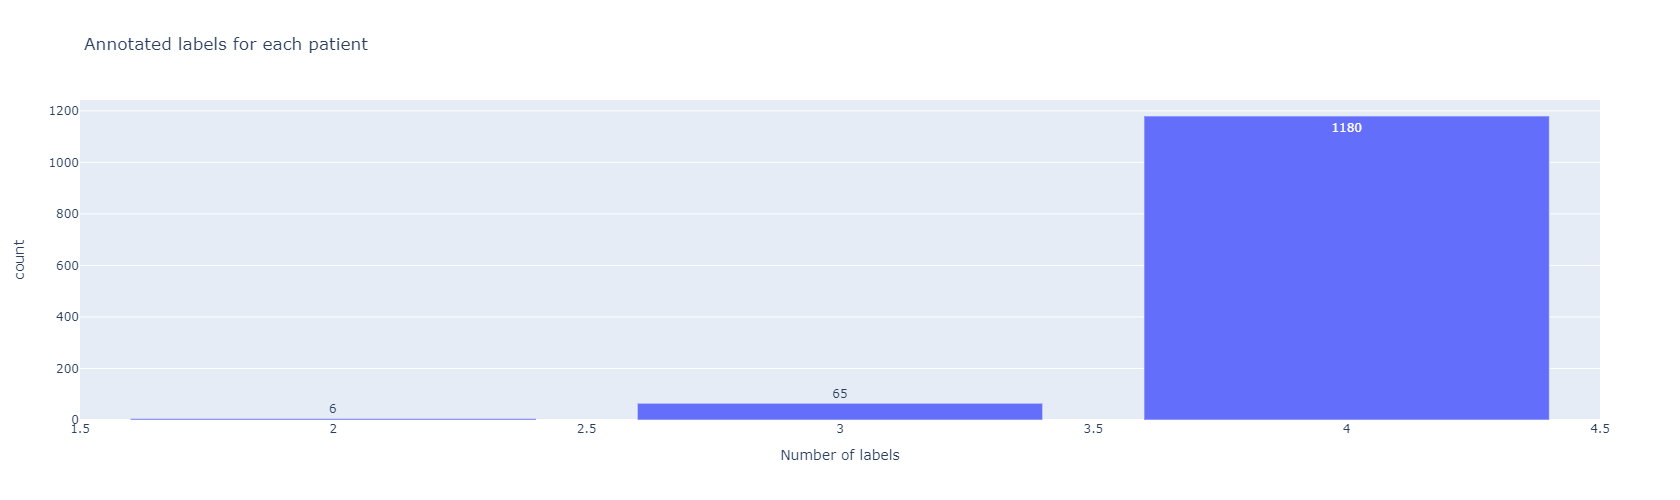

In [104]:
px.bar(x=nlabels, y=count, text=count, labels={"x": "Number of labels", "y": "count"}, height=500, width=500, title="Annotated labels for each patient")